<a href="https://colab.research.google.com/github/Pluviophile-1/-/blob/main/Lab1_MMO_Titanic_Data_Story.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Экспериментальное введение и требования

## **Создание "истории о данных" (Data Storytelling).**
Синонимом термина "история о данных" является термин "история на основе данных".
# Цель лабораторной работы:
изучение различных методов визуализация данных и создание истории на основе данных.

Краткое описание. Построение графиков, помогающих понять структуру данных, и их интерпретация.

Основой лабораторной работы является методология визуализации данных data-to-viz

А также источники по построению историй о данных:

«Storytelling with Data», Cole Nussbaumer Knaflic: неформальный обзор-конспект книги
www.storytellingwithdata.com
Data Storytelling: Best Practices and Visualization Tips To Create Remarkable Reports
The Ultimate Guide: Data Visualization vs. Storytelling with Data
Рекомендуемые инструментальные средства можно посмотреть здесь.
## Требования к отчету:
Отчет по лабораторной работе должен содержать:

титульный лист;
описание задания;
текст программы;
экранные формы с примерами выполнения программы.
В случае использования ноутбуков фрагменты 3 и 4 соответствуют ячейкам ноутбуков. Отчеты размещаются в репозитории курса, который каждый студент создает в своем профиле на github.
## Задание:
Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.
Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.

Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.
Сформировать отчет и разместить его в своем репозитории на github.

In [2]:
from IPython.display import display, Javascript

colab_url = "https://colab.research.google.com/github/zhaojin-2001/MMO/blob/main/Lab1_MMO_Titanic_Data_Story.ipynb"

metadata = {
    "colab": {
        "name": "Lab1_MMO_Titanic_Data_Story",
        "provenance": [],
        "toc_visible": True,
        "include_colab_link": True,
        "url": colab_url  # 关键：手动指定链接
    }
}

display(Javascript(f"""
    require(["base/js/namespace"], function(IPython) {{
        IPython.notebook.metadata = {metadata};
        IPython.notebook.save_checkpoint();
    }});
"""))

<IPython.core.display.Javascript object>

# Предварительная подготовка к эксперименту

Сначала устанавливаем необходимые библиотеки.Затем мы импортируем набор данных и предварительно просматриваем первые несколько строк набора данных, чтобы убедиться, что набор данных был успешно импортирован.

In [1]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 设置绘图风格
sns.set(style="whitegrid")

# 下载并加载数据集
url = "https://gitcode.com/open-source-toolkit/4f2bf"  # 数据集来源[^1^]
data_path = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"  # Kaggle数据集的公开链接[^5^]
titanic_df = pd.read_csv(data_path)

# 查看数据集的前几行
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# Анализ данных

Сначала мы проводим анализ социальной структуры пассажиров «Титаника», анализируя распределение пассажиров по разным классам кают (Pclass) и по полу (Sex). Затем мы используем столбчатую диаграмму, чтобы показать гендерное распределение в различных классах кают.

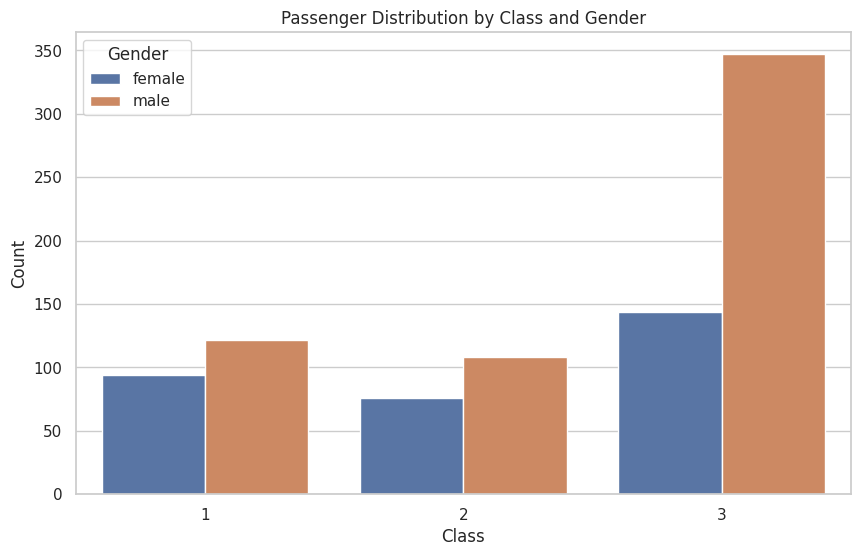

In [3]:
# 舱位等级和性别的分布
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Sex', data=titanic_df)
plt.title('Passenger Distribution by Class and Gender')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

Результаты: в первом классе (класс 1) было больше пассажиров-мужчин, чем пассажиров-женщин; во втором классе (класс 2) и третьем классе (класс 3) также было больше пассажиров-мужчин, чем пассажиров-женщин, но в третьем классе было относительно больше пассажиров-женщин.

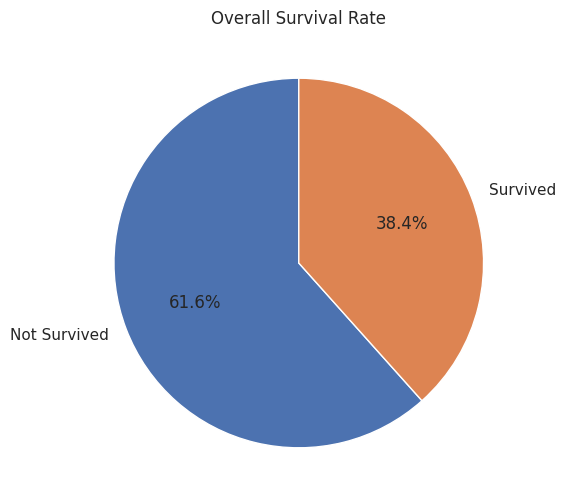

In [7]:

# 生存率饼图
survived = titanic_df['Survived'].value_counts()
labels = ['Not Survived', 'Survived']
plt.figure(figsize=(8, 6))
plt.pie(survived, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Overall Survival Rate')
plt.show()

<Figure size 1000x600 with 0 Axes>

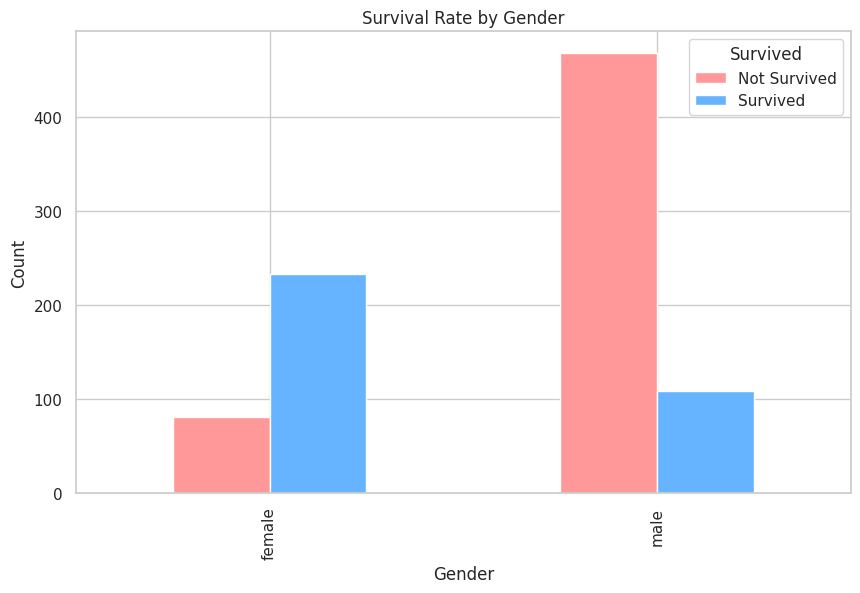

In [9]:
import seaborn as sns

# 按性别和生存情况分组的计数
gender_survival = titanic_df.groupby(['Sex', 'Survived']).size().unstack()

# 创建分组条形图
plt.figure(figsize=(10, 6))
gender_survival.plot(kind='bar', figsize=(10, 6), color=['#ff9999', '#66b3ff'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'], title='Survived')
plt.show()

Теперь мы проанализируем взаимосвязь между уровнем выживаемости и классом каюты и изучим различия в уровнях выживаемости между различными классами кают.

<Figure size 1000x600 with 0 Axes>

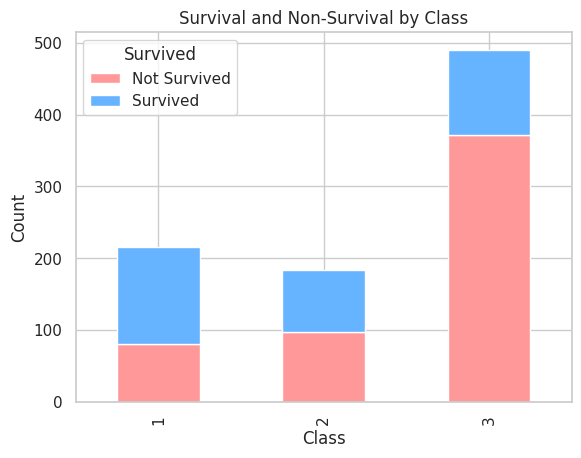

In [12]:
# 按舱位等级和生存情况分组的计数
class_survival = titanic_df.groupby(['Pclass', 'Survived']).size().unstack()

# 创建堆叠条形图
plt.figure(figsize=(10, 6))
class_survival.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'])
plt.title('Survival and Non-Survival by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'], title='Survived')
plt.show()

Результаты: Самый высокий уровень выживаемости был у первого класса, за ним следовал второй класс, а самый низкий уровень выживаемости был у третьего класса.

Нас также интересует влияние возраста на выживаемость, и поэтому мы проанализируем взаимосвязь между возрастным распределением и выживаемостью.Обратите внимание, что в наших первоначальных экспериментах мы получили предупреждения о наличии бесконечных значений, но мы уже убедились, что с данными нет никаких проблем, поэтому мы можем игнорировать эти предупреждения.

In [ ]:
# 检查数据集中是否存在无穷大值
print(titanic_df.isin([np.inf, -np.inf]).any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool


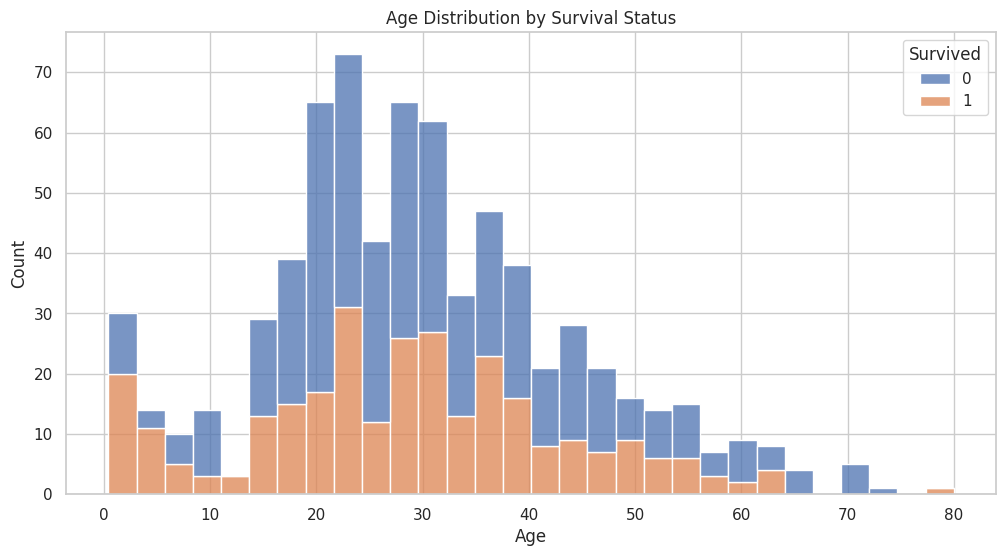

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

# 您的绘图代码
plt.figure(figsize=(12, 6))
sns.histplot(data=titanic_df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Результаты: Среди выживших пассажиров распределение по возрасту было относительно равномерным, но процент выживших был выше среди молодых пассажиров (особенно детей).

Есть ли взаимосвязь между ценами на билеты и выживаемостью? Для демонстрации этой взаимосвязи мы воспользуемся диаграммой размаха.

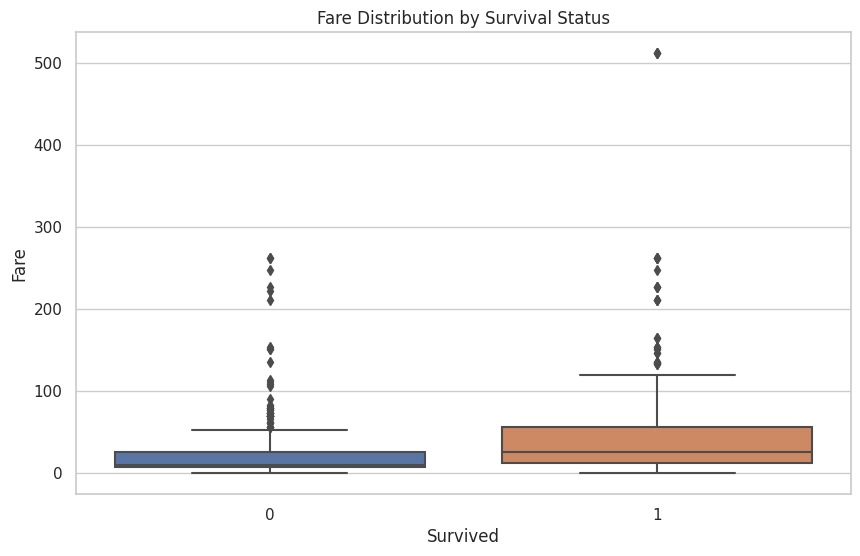

In [ ]:
# 票价与生存状态的关系
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=titanic_df)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

Результаты: Среди выживших пассажиров медиана и диапазон распределения тарифов были выше, чем у невыживших пассажиров.

Наконец, мы всесторонне проанализируем интерактивное влияние пола, класса обслуживания, возраста и цены билета на показатель выживаемости.

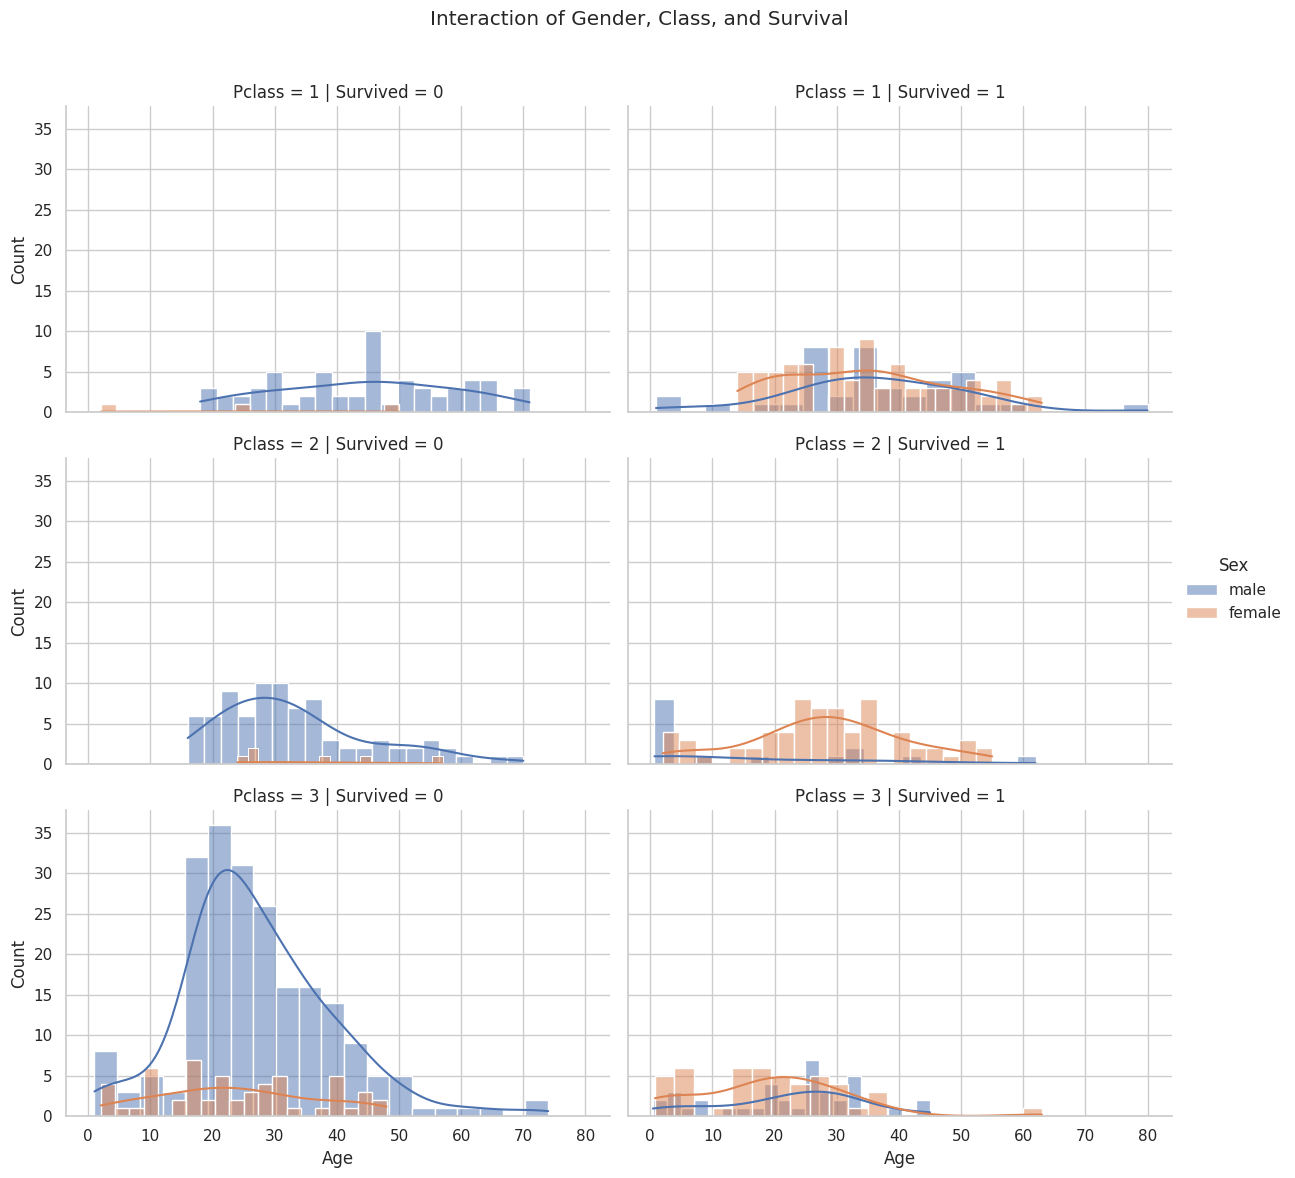

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)
# 性别、舱位等级和生存状态的交互分析
titanic_df.replace([np.inf, -np.inf], np.nan, inplace=True)
g = sns.FacetGrid(titanic_df, col='Survived', row='Pclass', hue='Sex', height=4, aspect=1.5)
g.map(sns.histplot, 'Age', bins=20, kde=True)
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Interaction of Gender, Class, and Survival')
plt.show()

Результаты: у женщин были более высокие показатели выживаемости, чем у мужчин, во всех классах путешествия; показатели выживаемости женщин в первом и втором классах были особенно высокими; показатели выживаемости пассажиров третьего класса были в целом ниже, но у женщин все равно были более высокие шансы на выживание, чем у мужчин.

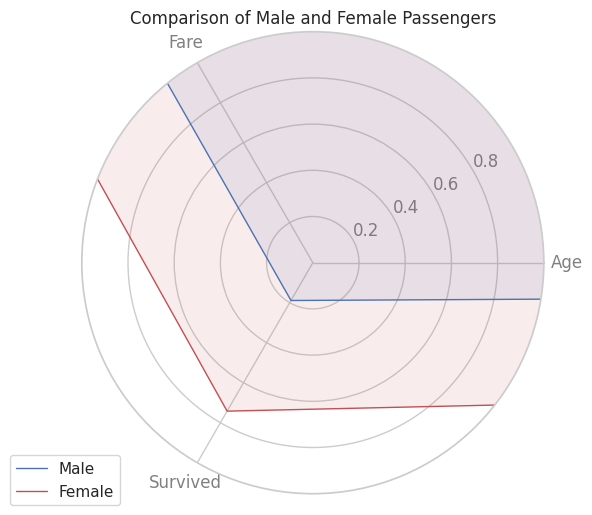

In [13]:
from math import pi

# 创建一个雷达图
categories = ['Age', 'Fare', 'Survived']
labels = list(categories)

# 创建一个圆形的雷达图
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

# 准备数据
male_data = titanic_df[titanic_df['Sex'] == 'male'][categories].mean().values.tolist()
female_data = titanic_df[titanic_df['Sex'] == 'female'][categories].mean().values.tolist()
male_data += male_data[:1]
female_data += female_data[:1]

# 创建雷达图
plt.figure(figsize=(10, 6))
ax = plt.subplot(111, polar=True)

# 添加每个变量的标签
plt.xticks(angles[:-1], labels, color='grey', size=12)

# 添加y轴标签
ax.set_rlabel_position(30)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=12)
plt.ylim(0, 1)

# 绘制男性数据
ax.plot(angles, male_data, linewidth=1, linestyle='solid', label='Male')
ax.fill(angles, male_data, 'b', alpha=0.1)

# 绘制女性数据
ax.plot(angles, female_data, linewidth=1, linestyle='solid', label='Female', color='r')
ax.fill(angles, female_data, 'r', alpha=0.1)

# 添加图例
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Comparison of Male and Female Passengers')
plt.show()

具体维度分析
（1）年龄（Age）
女性乘客的平均年龄略高于男性乘客。
这可能表明女性乘客中成年女性的比例相对较高，而男性乘客中可能有更多年轻男性或儿童。
（2）票价（Fare）
女性乘客的平均票价显著高于男性乘客。
这可能暗示女性乘客更多地集中在较高舱位（如一等舱或二等舱），而男性乘客可能更多地分布在较低舱位（如三等舱）。
较高的票价通常与更好的住宿条件、更高的社会地位和更多的资源有关，这可能间接影响了生存率。
（3）生存率（Survived）
女性乘客的生存率明显高于男性乘客。
这与历史记录中泰坦尼克号沉没时“妇女和儿童优先”的救援政策相符。
女性乘客在紧急情况下得到了更多的救助资源，从而显著提高了她们的生存机会。

# заключение

Уровень выживаемости среди женщин-пассажиров, как правило, был выше, чем среди мужчин, а уровень выживаемости среди детей также был выше, что может быть связано с политикой спасательных операций того времени: «Сначала женщины и дети». Во-вторых, выживаемость пассажиров первого и второго классов была выше, чем в третьем классе, что может быть связано с лучшим положением на борту и вероятностью спасения. Возрастное распределение пассажиров в разных классах салона и статус выживания различаются, но в целом выживаемость молодых пассажиров (особенно в возрасте 20-30 лет) выше. Поэтому предполагается, что молодые люди имеют лучшую физическую подготовку и могут дольше выдерживать катастрофы и ждать спасения.